# Mobile Price Dataset

## Outline:
    1.Introduction
    2.Import Libraries
    3.Read Dataset
    4.Preprocessing 
      4.1 Changes Columns Name
      4.2 See If Have Null & See Summary Statistics
      4.3 Take a copy from data and work in it
         4.3.1 Encoding categorical variable to numerics
         4.3.2 Handling Missing Values
         4.3.3 Multicolinearity
      4.4 Splitting the dataset into the Training set ,Validtion set and Test set
      4.5 Feature Scaling
      

## 1.Introduction

The price of a product is the most important attribute of marketing that product. One of those products where price matters a lot is a smartphone because it comes with a lot of features so that a company thinks a lot about how to price this mobile which can justify the features and also cover the marketing and manufacturing costs of the mobile. In this article, I will walk you through the task of mobile price classification with Machine Learning using Python.

## 2.Import Libraries

In [1]:
#Import libraries for DataSet
import os
import numpy as np
import pandas as pd

#Import Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## 3.Read Dataset

In [2]:
# Importing data into python from the given csv file
dataset= pd.read_csv('our_dataset.csv')


In [3]:
#See Head of our Dataset
print("----------------------------------------------->Head of Dataset<------------------------------------------------------")
print()
dataset.head()

----------------------------------------------->Head of Dataset<------------------------------------------------------



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0


In [4]:
#See Tail of our Dataset
print("----------------------------------------------->Tail of Dataset<------------------------------------------------------")
print()
dataset.tail()

----------------------------------------------->Tail of Dataset<------------------------------------------------------



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,1,3.0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0.0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,NaN


In [5]:
#Display information about our dataset
print("------------>Information about the Dataset<------------")
print()
dataset.info()

------------>Information about the Dataset<------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  


In [6]:
#Display dtypes about our dataset
print("------------>Dtypes of the Dataset<------------")
print()
dataset.dtypes

------------>Dtypes of the Dataset<------------



battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range      float64
dtype: object

## 4.Preprocessing 

Pre-processing refers to the transformations applied to our data before feeding it to the algorithm. Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

### 4.2 See If Have Null & See Summary Statistics

In [7]:
#Checking the missing values in our dataset if any
dataset.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      3
dtype: int64

In [8]:
#Summary statistics of the training dataset
print("--------------------------------------->Decription of the DataSet<---------------------------------------------------")
print()
pd.DataFrame(dataset.describe())

--------------------------------------->Decription of the DataSet<---------------------------------------------------



,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1997.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.498748
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118089
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### 4.3 Take a copy from data and work in it

In [9]:
dataset_cop = dataset.copy()

In [10]:
# Replacing 0s and 1s in the wi_fi column with the appropriate strings
dataset_cop['wifi'] =dataset_cop['wifi'].replace(0, 'NoWifi')
dataset_cop['wifi'] =dataset_cop['wifi'].replace(1, 'Wifi')

In [11]:
dataset_cop['wifi'].unique()

array(['Wifi', 'NoWifi'], dtype=object)

In [12]:
dataset_cop['blue'] = dataset_cop['blue'].replace(0, 'Noblue')
dataset_cop['blue'] = dataset_cop['blue'].replace(1, 'blue')

In [13]:
dataset_cop['blue'].unique()

array(['Noblue', 'blue'], dtype=object)

In [14]:
dataset_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   object 
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [15]:
dataset_cop.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,Noblue,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,Wifi,1.0
1,1021,blue,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,NoWifi,2.0
2,563,blue,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,NoWifi,2.0
3,615,blue,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,NoWifi,2.0
4,1821,blue,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,NoWifi,1.0


#### 4.3.1 Encoding categorical variable to numerics


In [16]:
from sklearn.preprocessing import LabelEncoder
leEncoder= LabelEncoder()
dataset_cop['wifi'] = leEncoder.fit_transform(dataset['wifi'])

In [17]:
dataset_cop.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,Noblue,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1.0
1,1021,blue,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2.0
2,563,blue,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2.0
3,615,blue,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2.0
4,1821,blue,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1.0


In [18]:
map_dict = {'Noblue' : 0,'blue' : 1}
dataset_cop['blue'] = dataset_cop['blue'].map(map_dict);

In [19]:
dataset_cop.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0.0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2.0
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,1,3.0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0.0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,NaN


In [20]:
dataset_cop.pc.unique()

array([ 2,  6,  9, 14,  7, 10,  0, 15,  1, 18, 17, 11, 16,  4, 20, 13,  3,
       19,  8,  5, 12], dtype=int64)

In [21]:
dataset_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### 4.3.2 Handling Missing Values

In [22]:
dataset_cop['price_range'].unique()

array([ 1.,  2.,  3.,  0., nan])

In [23]:
dataset_cop['price_range'].fillna(value=2,inplace=True)

In [24]:
dataset_cop['price_range'].unique()

array([1., 2., 3., 0.])

In [25]:
# Recheck for missing values (NaN) in the dataset
dataset_cop.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [26]:
dataset_cop['price_range'].value_counts()

2.0    503
0.0    500
1.0    499
3.0    498
Name: price_range, dtype: int64

In [27]:
#When we want to make to our dataset
dataset['price_range'].fillna(value=2,inplace=True)
dataset.isna().any()


battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

#### 4.3.3 Multicolinearity

In [28]:
dataset.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.007332,0.202328
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.023864,0.021032
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.023981,-0.006489
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.024741,0.017019
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020315,0.022048
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.015618,0.014355
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.007985,0.044324
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028006,0.000701
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000805,-0.030298
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.008652,0.004113


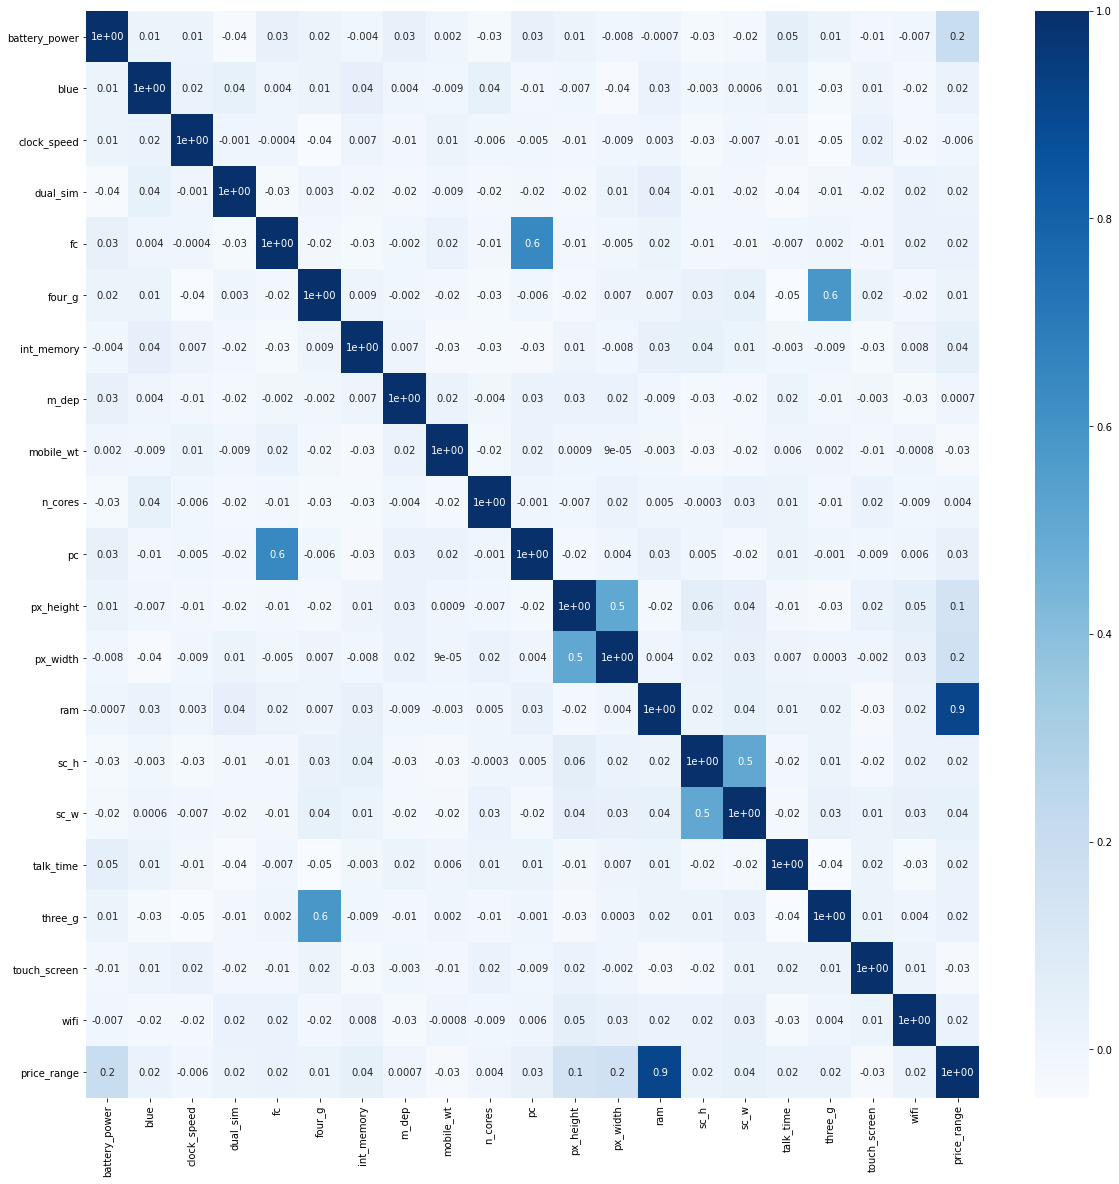

In [29]:
plt.figure(figsize=(20,20))
sns.heatmap(data=dataset.corr(), annot=True, cmap='Blues' ,  fmt='.1')
plt.show()

### 4.4 Splitting the dataset into the Training set ,Validtion set and Test set

In [30]:
X = dataset.iloc[:,0:-1]
Y = dataset['price_range']

In [31]:
from sklearn.model_selection import train_test_split
#Spilt data to 3 Part(Train,Validation,Test)


# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X,Y, train_size=0.8)



# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)


test_size = 0.5

X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [32]:
#See How it spilt

print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_Valid shape: {}".format(X_valid.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y_valid shape: {}".format(y_valid.shape))

X_train shape: (1600, 20)
X_test shape: (200, 20)
X_Valid shape: (200, 20)
y_train shape: (1600,)
y_test shape: (200,)
y_valid shape: (200,)


### 4.5 Feature Scaling

In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# **SVM**

In [34]:
from sklearn.svm import SVC

clf = SVC(kernel='linear', gamma=0.001, C=1)
clf.fit(X_train , y_train)
y_pred=clf.predict(X_test)

In [35]:

from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
#calculate the accuracy
print ('\naccuracy_score\n')
print (accuracy_score(y_test , y_pred)*100 ,'%')
print("----------------------------------------------------------------------")

#calculate the confusion_matrix
print ('\nconfusion_matrix\n')
print(confusion_matrix(y_pred,y_test))

print("----------------------------------------------------------------------")
#classification report
print (classification_report(y_test,y_pred))

print("----------------------------------------------------------------------")




accuracy_score

96.5 %
----------------------------------------------------------------------

confusion_matrix

[[52  0  0  0]
 [ 3 45  0  0]
 [ 0  3 48  1]
 [ 0  0  0 48]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        55
         1.0       0.94      0.94      0.94        48
         2.0       0.92      1.00      0.96        48
         3.0       1.00      0.98      0.99        49

    accuracy                           0.96       200
   macro avg       0.97      0.97      0.96       200
weighted avg       0.97      0.96      0.97       200

----------------------------------------------------------------------


# ROC Curve

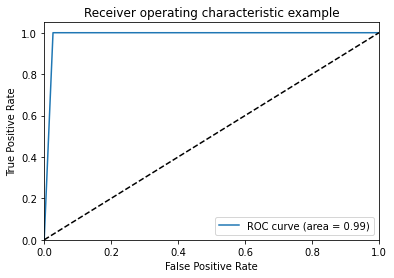

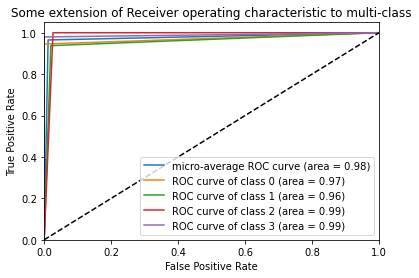

In [36]:
from sklearn.metrics import roc_curve,auc
from sklearn.preprocessing import label_binarize

y_t = label_binarize(y_test, classes=[0, 1, 2,3])
y_pr = label_binarize(y_pred, classes=[0, 1, 2,3])

n_classes=4
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_t[:, i], y_pr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# # Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_t.ravel(), y_pr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr[2], tpr[2], label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

No handles with labels found to put in legend.


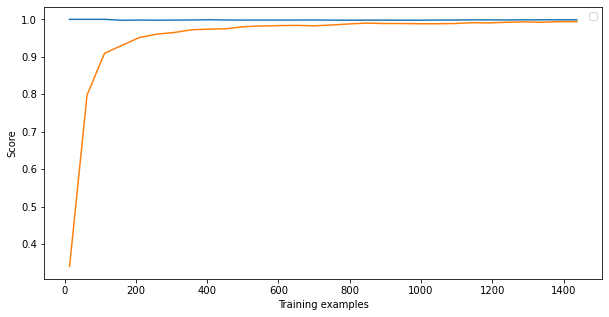

In [37]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_digits



def plot_learning_curve(
    estimator,
    title,
    X,
    Y,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.01, 1.0, 30),
):

    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve

    axes.plot(
        train_sizes, train_scores_mean)
    axes.plot(
        train_sizes, test_scores_mean)
    axes.legend()


    return plt


fig, axes = plt.subplots(1, 1, figsize=(10, 5))

X, y = load_digits(return_X_y=True)

title = r"Learning Curves (SVM, linear kernel)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(
    estimator, title, X, y, cv=cv, n_jobs=4
)

plt.show()